## Import libraries.

In [1]:
import pandas as pd  
import numpy as np
import os                           # For file processing.
import xlsxwriter
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Set relative paths for the data

In [2]:
# Get the current directory.
current_dir = os.getcwd()

# Get the data from location folder.
data_dir    = os.path.join(current_dir,'data')
Köln_directory = os.path.join(data_dir, 'Köln')
NeuIsenburg_data = os.path.join(data_dir, 'Neu-Isenburg')
GHG_Tools = os.path.join(data_dir, 'Tools')
Output_xls_file  = os.path.join(data_dir,'Summmarised_metrics.xlsx')
Mock_output_xls_file  = os.path.join(data_dir,'Mocked_metrics.xlsx')

print('current_dir           =',current_dir)
print('data_dir              =',data_dir)
print('Köln_directory        =',Köln_directory)
print('NeuIsenburg_data      =',NeuIsenburg_data)
print('GHG Tools             =',GHG_Tools)
print('Output_xls_file       =',Output_xls_file)
print('Mock_output_xls_file  =',Mock_output_xls_file)

current_dir           = C:\Users\m033\MSc\DataAnalyticsAndVisualisation\project
data_dir              = C:\Users\m033\MSc\DataAnalyticsAndVisualisation\project\data
Köln_directory        = C:\Users\m033\MSc\DataAnalyticsAndVisualisation\project\data\Köln
NeuIsenburg_data      = C:\Users\m033\MSc\DataAnalyticsAndVisualisation\project\data\Neu-Isenburg
GHG Tools             = C:\Users\m033\MSc\DataAnalyticsAndVisualisation\project\data\Tools
Output_xls_file       = C:\Users\m033\MSc\DataAnalyticsAndVisualisation\project\data\Summmarised_metrics.xlsx
Mock_output_xls_file  = C:\Users\m033\MSc\DataAnalyticsAndVisualisation\project\data\Mocked_metrics.xlsx


## The office invoices are in German and will need translation.  This dictionary will be used as a lookup to change column names and data values.  It was constructed using Google translare.  There is a google translate module in python but static values are needed.

In [3]:
# Create a translation dictionary to change teh german invoive items to english.
Translate_Dict = {
'grundsteur':'Basic_Tax',
'wasser':'Water',
'entwasserung':'Drainage',
'regenwasser':'Rainwater',
'entwasserung (regenwasser)':'drainage (rainwater)',
'strassenreinigung':'Street_Cleaning',
'mullabfuhr':'Garbage_Disposal',
'hausreinigung':'House_Cleaning',
'hausreinigung (dienstl)':'house cleaning (service)',
'gartenpflege':'Garden_Maintenance',
'gartenpflege (dienstl)':'garden maintenance (dienstl)',
'stromkosten':'Electricity_Costs',
'gebaudeversicherung':'Building_Insurance',
'haftplichtgebaudeversicherung':'Liability_Building_Insurance',
'wartung rauchschutz':'Maintenance_Smoke_Protection',
'wartung prufung':'Maintenance_Check',
'feuerloscherpufung':'Fire_Extinguisher_Test',
'hauswartleist':'Caretaker',
'heizkosten':'Heating_Costs',
'kostenart':'Cost_Type',
'umlageschlussel':'Turnover_Key',
'nutzflache':'Usable_Area',
'bemessung gesamt':'Overall_Dimensioning',
'bemessung anteilig':'Measurement_Pro_Rata',
'gesamt kosten':'Total_Cost',
'ihre kosten':'Your_Costs'};
Translate_Dict

{'grundsteur': 'Basic_Tax',
 'wasser': 'Water',
 'entwasserung': 'Drainage',
 'regenwasser': 'Rainwater',
 'entwasserung (regenwasser)': 'drainage (rainwater)',
 'strassenreinigung': 'Street_Cleaning',
 'mullabfuhr': 'Garbage_Disposal',
 'hausreinigung': 'House_Cleaning',
 'hausreinigung (dienstl)': 'house cleaning (service)',
 'gartenpflege': 'Garden_Maintenance',
 'gartenpflege (dienstl)': 'garden maintenance (dienstl)',
 'stromkosten': 'Electricity_Costs',
 'gebaudeversicherung': 'Building_Insurance',
 'haftplichtgebaudeversicherung': 'Liability_Building_Insurance',
 'wartung rauchschutz': 'Maintenance_Smoke_Protection',
 'wartung prufung': 'Maintenance_Check',
 'feuerloscherpufung': 'Fire_Extinguisher_Test',
 'hauswartleist': 'Caretaker',
 'heizkosten': 'Heating_Costs',
 'kostenart': 'Cost_Type',
 'umlageschlussel': 'Turnover_Key',
 'nutzflache': 'Usable_Area',
 'bemessung gesamt': 'Overall_Dimensioning',
 'bemessung anteilig': 'Measurement_Pro_Rata',
 'gesamt kosten': 'Total_Cost'

# Collect Neu-Isenburg data

### Read the electricity invoices for Neu-Isenburg into a pandas dataframe

In [4]:
NI_elec_data = os.path.join(NeuIsenburg_data,'Strom- und Wasserverbrauch 18-20.xlsx')
df_NI_electricity = pd.read_excel(NI_elec_data,sheet_name='Tabelle1')
df_NI_electricity

,STROM,2018,2019,2020
0,Januar,16210.0,16637.0,15140.0
1,Februar,14146.0,15135.0,14130.0
2,März,15374.0,16090.0,12952.0
3,April,14092.0,14468.0,10089.0
4,Mai,14173.0,14698.0,10542.0
5,Juni,14556.0,13564.0,10091.0
6,Juli,15208.0,15181.0,10571.0
7,August,15908.0,15058.0,10311.0
8,September,14237.0,14320.0,10249.0
9,Oktober,15829.0,15233.0,11502.0


In [5]:
# Check the colimn names
print (df_NI_electricity.columns.values.tolist())

['STROM', 2018, 2019, 2020]


In [6]:
# The year columns have no quotes so will not appear in the index.

# Create new columns and assign the existing values.
df_NI_electricity['2018'] = df_NI_electricity[2018]
df_NI_electricity['2019'] = df_NI_electricity[2019]
df_NI_electricity['2020'] = df_NI_electricity[2020]

# Drop the existing columns
df_NI_electricity = df_NI_electricity.drop(columns=[2018,2019,2020])

# Check the colimn names
print (df_NI_electricity.columns.values.tolist())

['STROM', '2018', '2019', '2020']


In [7]:
# Drop the Nan rows.
df_NI_electricity = df_NI_electricity.dropna()
# Remove that last 4 rows.
df_NI_electricity = df_NI_electricity.iloc[:-4]

# Add a Mteric column.
df_NI_electricity['Metric'] = 'Electricity'

# Rename the columns to an english value.
df_NI_electricity.rename(columns = {'STROM':'Month'}, inplace = True)

# Convert the German months to numbers
df_NI_electricity['Month'] = df_NI_electricity['Month'].map({'Januar': 1, 
                                                             'Februar': 2, 
                                                             'März': 3, 
                                                             'April': 4, 
                                                             'Mai': 5, 
                                                             'Juni': 6, 
                                                             'Juli': 7, 
                                                             'August': 8, 
                                                             'September': 9, 
                                                             'Oktober': 10, 
                                                             'November': 11, 
                                                             'Dezember': 12})
df_NI_electricity['Measure'] = 'Kilowatts'
df_NI_electricity.head()


,Month,2018,2019,2020,Metric,Measure
0,1,16210.0,16637.0,15140.0,Electricity,Kilowatts
1,2,14146.0,15135.0,14130.0,Electricity,Kilowatts
2,3,15374.0,16090.0,12952.0,Electricity,Kilowatts
3,4,14092.0,14468.0,10089.0,Electricity,Kilowatts
4,5,14173.0,14698.0,10542.0,Electricity,Kilowatts


In [8]:
# Look at the datatypes
df_NI_electricity.dtypes

Month        int64
2018       float64
2019       float64
2020       float64
Metric      object
Measure     object
dtype: object

### Datatypes look correct.
### The dataframe is almost in the correct format identified in the Identify_Data notebook. The only change is to summarise the years.

### Read the general office invoices for Neu-Isenburg into a pandas dataframe

In [9]:
# Read the NI general office invoice.  It will contain some non relevant data which will be filtered.
NI_gen_data = os.path.join(NeuIsenburg_data,'20205716 Wohnbau.xlsx')
df_NI_general_2018 = pd.read_excel(NI_gen_data,sheet_name='Sheet1')
# Create a Year column.
df_NI_general_2018.head()

,kostenart,umlageschlussel,bemessung gesamt,bemessung anteilig,gesamt kosten,ihre kosten
0,grundsteur,nutzflache,335.1,21.5625,647.0475,41.6325
1,wasser,nutzflache,335.1,21.5625,474.4275,30.5325
2,entwasserung,nutzflache,335.1,21.5625,703.2450,45.2550
3,entwasserung (regenwasser),nutzflache,335.1,21.5625,249.0600,16.0275
4,strassenreinigung,nutzflache,335.1,21.5625,94.9500,6.1125


In [10]:
# Rename the columns to an english value, using teh translation dictionaty.
df_NI_general_2018.rename(columns = {'kostenart':(Translate_Dict.get("kostenart"))}, inplace = True)
df_NI_general_2018.rename(columns = {'umlageschlussel':(Translate_Dict.get("umlageschlussel"))}, inplace = True)
df_NI_general_2018.rename(columns = {'bemessung gesamt':(Translate_Dict.get("bemessung gesamt"))}, inplace = True)
df_NI_general_2018.rename(columns = {'bemessung anteilig':(Translate_Dict.get("bemessung anteilig"))}, inplace = True)
df_NI_general_2018.rename(columns = {'gesamt kosten':(Translate_Dict.get("gesamt kosten"))}, inplace = True)
df_NI_general_2018.rename(columns = {'ihre kosten':(Translate_Dict.get("ihre kosten"))}, inplace = True)

# Drop the Nan rows.  Anything without a value is not an invoice line item.
df_NI_general_2018 = df_NI_general_2018.dropna()

df_NI_general_2018.head()

,Cost_Type,Turnover_Key,Overall_Dimensioning,Measurement_Pro_Rata,Total_Cost,Your_Costs
0,grundsteur,nutzflache,335.1,21.5625,647.0475,41.6325
1,wasser,nutzflache,335.1,21.5625,474.4275,30.5325
2,entwasserung,nutzflache,335.1,21.5625,703.2450,45.2550
3,entwasserung (regenwasser),nutzflache,335.1,21.5625,249.0600,16.0275
4,strassenreinigung,nutzflache,335.1,21.5625,94.9500,6.1125


In [11]:
# Create a mask to use in translation of the Cost_Type column
Cost_Type_mask = df_NI_general_2018['Cost_Type'].isin(Translate_Dict.keys())

# Create a mask to use in translation of the Cost_Type column
Turnover_Key_mask = df_NI_general_2018['Turnover_Key'].isin(Translate_Dict.keys())

# Translate teh 2 columns with german data
df_NI_general_2018.loc[Cost_Type_mask, 'Cost_Type'] = df_NI_general_2018.loc[Cost_Type_mask, 'Cost_Type'].map(Translate_Dict)
df_NI_general_2018.loc[Turnover_Key_mask, 'Turnover_Key'] = df_NI_general_2018.loc[Turnover_Key_mask, 'Turnover_Key'].map(Translate_Dict)
df_NI_general_2018.head()

,Cost_Type,Turnover_Key,Overall_Dimensioning,Measurement_Pro_Rata,Total_Cost,Your_Costs
0,Basic_Tax,Usable_Area,335.1,21.5625,647.0475,41.6325
1,Water,Usable_Area,335.1,21.5625,474.4275,30.5325
2,Drainage,Usable_Area,335.1,21.5625,703.2450,45.2550
3,drainage (rainwater),Usable_Area,335.1,21.5625,249.0600,16.0275
4,Street_Cleaning,Usable_Area,335.1,21.5625,94.9500,6.1125


In [12]:
# Drop the columns we don't need
df_NI_general_2018 = df_NI_general_2018.drop(columns=['Turnover_Key','Overall_Dimensioning','Measurement_Pro_Rata','Your_Costs'])

df_NI_general_2018.rename(columns = {'Total_Cost':'2018'}, inplace = True)
df_NI_general_2018

,Cost_Type,2018
0,Basic_Tax,647.0475
1,Water,474.4275
2,Drainage,703.2450
3,drainage (rainwater),249.0600
4,Street_Cleaning,94.9500
5,Garbage_Disposal,722.6850
6,House_Cleaning,44.5575
7,house cleaning (service),400.7700
8,Garden_Maintenance,44.6625
9,garden maintenance (dienstl),563.9850


# Do the same for 2019 and 2020 and merge the dataframes at the end.

In [13]:
NI_gen_data = os.path.join(NeuIsenburg_data,'20205717 Wohnbau.xlsx')
df_NI_general_2019 = pd.read_excel(NI_gen_data,sheet_name='Sheet1')

# Rename the columns to an english value, using teh translation dictionaty.
df_NI_general_2019.rename(columns = {'kostenart':(Translate_Dict.get("kostenart"))}, inplace = True)
df_NI_general_2019.rename(columns = {'umlageschlussel':(Translate_Dict.get("umlageschlussel"))}, inplace = True)
df_NI_general_2019.rename(columns = {'bemessung gesamt':(Translate_Dict.get("bemessung gesamt"))}, inplace = True)
df_NI_general_2019.rename(columns = {'bemessung anteilig':(Translate_Dict.get("bemessung anteilig"))}, inplace = True)
df_NI_general_2019.rename(columns = {'gesamt kosten':(Translate_Dict.get("gesamt kosten"))}, inplace = True)
df_NI_general_2019.rename(columns = {'ihre kosten':(Translate_Dict.get("ihre kosten"))}, inplace = True)

# Drop the Nan rows.  Anything without a value is not an invoice line item.
df_NI_general_2019 = df_NI_general_2019.dropna()

# Translate teh 2 columns with german data
df_NI_general_2019.loc[Cost_Type_mask, 'Cost_Type'] = df_NI_general_2019.loc[Cost_Type_mask, 'Cost_Type'].map(Translate_Dict)
df_NI_general_2019.loc[Turnover_Key_mask, 'Turnover_Key'] = df_NI_general_2019.loc[Turnover_Key_mask, 'Turnover_Key'].map(Translate_Dict)

# Drop the columns we don't need
df_NI_general_2019 = df_NI_general_2019.drop(columns=['Turnover_Key','Overall_Dimensioning','Measurement_Pro_Rata','Your_Costs'])

df_NI_general_2019.rename(columns = {'Total_Cost':'2019'}, inplace = True)
df_NI_general_2019

,Cost_Type,2019
0,Basic_Tax,458.002324
1,Water,335.815991
2,Drainage,497.780834
3,drainage (rainwater),176.293176
4,Street_Cleaning,67.208853
5,Garbage_Disposal,465.037391
6,House_Cleaning,28.672110
7,house cleaning (service),257.889724
8,Garden_Maintenance,28.739676
9,garden maintenance (dienstl),362.916226


In [14]:
NI_gen_data = os.path.join(NeuIsenburg_data,'20205717 Wohnbau.xlsx')
df_NI_general_2020 = pd.read_excel(NI_gen_data,sheet_name='Sheet1')

# Rename the columns to an english value, using teh translation dictionaty.
df_NI_general_2020.rename(columns = {'kostenart':(Translate_Dict.get("kostenart"))}, inplace = True)
df_NI_general_2020.rename(columns = {'umlageschlussel':(Translate_Dict.get("umlageschlussel"))}, inplace = True)
df_NI_general_2020.rename(columns = {'bemessung gesamt':(Translate_Dict.get("bemessung gesamt"))}, inplace = True)
df_NI_general_2020.rename(columns = {'bemessung anteilig':(Translate_Dict.get("bemessung anteilig"))}, inplace = True)
df_NI_general_2020.rename(columns = {'gesamt kosten':(Translate_Dict.get("gesamt kosten"))}, inplace = True)
df_NI_general_2020.rename(columns = {'ihre kosten':(Translate_Dict.get("ihre kosten"))}, inplace = True)

# Drop the Nan rows.  Anything without a value is not an invoice line item.
df_NI_general_2020 = df_NI_general_2020.dropna()

# Translate teh 2 columns with german data
df_NI_general_2020.loc[Cost_Type_mask, 'Cost_Type'] = df_NI_general_2020.loc[Cost_Type_mask, 'Cost_Type'].map(Translate_Dict)
df_NI_general_2020.loc[Turnover_Key_mask, 'Turnover_Key'] = df_NI_general_2020.loc[Turnover_Key_mask, 'Turnover_Key'].map(Translate_Dict)

# Drop the columns we don't need
df_NI_general_2020 = df_NI_general_2020.drop(columns=['Turnover_Key','Overall_Dimensioning','Measurement_Pro_Rata','Your_Costs'])

df_NI_general_2020.rename(columns = {'Total_Cost':'2020'}, inplace = True)
df_NI_general_2020

,Cost_Type,2020
0,Basic_Tax,458.002324
1,Water,335.815991
2,Drainage,497.780834
3,drainage (rainwater),176.293176
4,Street_Cleaning,67.208853
5,Garbage_Disposal,465.037391
6,House_Cleaning,28.672110
7,house cleaning (service),257.889724
8,Garden_Maintenance,28.739676
9,garden maintenance (dienstl),362.916226


## Now merge the 3 annual Neu-Isenberg dataframes, remove rows and columns that are not needed and create a dataframe that will fit the desired visualisations.

In [15]:
# Join 2018 and 2019
df_inner = pd.merge(df_NI_general_2019, df_NI_general_2020, on='Cost_Type', how='inner')
# Join the merged 2018/2019 to 2020
df_NI_general = pd.merge(df_NI_general_2018, df_inner, on='Cost_Type', how='inner')
df_NI_general['Location'] = 'Neu-Isenburg'

df_NI_general

,Cost_Type,2018,2019,2020,Location
0,Basic_Tax,647.0475,458.002324,458.002324,Neu-Isenburg
1,Water,474.4275,335.815991,335.815991,Neu-Isenburg
2,Drainage,703.2450,497.780834,497.780834,Neu-Isenburg
3,drainage (rainwater),249.0600,176.293176,176.293176,Neu-Isenburg
4,Street_Cleaning,94.9500,67.208853,67.208853,Neu-Isenburg
5,Garbage_Disposal,722.6850,465.037391,465.037391,Neu-Isenburg
6,House_Cleaning,44.5575,28.672110,28.672110,Neu-Isenburg
7,house cleaning (service),400.7700,257.889724,257.889724,Neu-Isenburg
8,Garden_Maintenance,44.6625,28.739676,28.739676,Neu-Isenburg
9,garden maintenance (dienstl),563.9850,362.916226,362.916226,Neu-Isenburg


In [16]:
# Drop the rows we don't need, that contain specific 'value' in 'column_name'
df_NI_general = df_NI_general[df_NI_general.Cost_Type != 'Basic_Tax']
df_NI_general = df_NI_general[df_NI_general.Cost_Type != 'Street_Cleaning']
df_NI_general = df_NI_general[df_NI_general.Cost_Type != 'House_Cleaning']
df_NI_general = df_NI_general[df_NI_general.Cost_Type != 'house cleaning (service)']
df_NI_general = df_NI_general[df_NI_general.Cost_Type != 'Garden_Maintenance']
df_NI_general = df_NI_general[df_NI_general.Cost_Type != 'garden maintenance (dienstl)']
df_NI_general = df_NI_general[df_NI_general.Cost_Type != 'Building_Insurance']
df_NI_general = df_NI_general[df_NI_general.Cost_Type != 'Liability_Building_Insurance']
df_NI_general = df_NI_general[df_NI_general.Cost_Type != 'Maintenance_Smoke_Protection']
df_NI_general = df_NI_general[df_NI_general.Cost_Type != 'Maintenance_Check']
df_NI_general = df_NI_general[df_NI_general.Cost_Type != 'Fire_Extinguisher_Test']
df_NI_general = df_NI_general[df_NI_general.Cost_Type != 'Caretaker']

# Rename the columns to match the existing data.
df_NI_general.rename(columns = {'Cost_Type':'Metric'}, inplace = True)

# Create a measure column.
df_NI_general['Measure'] = ''

df_NI_general

,Metric,2018,2019,2020,Location,Measure
1,Water,474.4275,335.815991,335.815991,Neu-Isenburg,
2,Drainage,703.2450,497.780834,497.780834,Neu-Isenburg,
3,drainage (rainwater),249.0600,176.293176,176.293176,Neu-Isenburg,
5,Garbage_Disposal,722.6850,465.037391,465.037391,Neu-Isenburg,
10,Electricity_Costs,166.0350,106.841132,106.841132,Neu-Isenburg,


In [17]:
# Populate measure column.
df_NI_general.loc[df_NI_general['Metric'] == 'Water', 'Measure'] = 'Kilo'
df_NI_general.loc[df_NI_general['Metric'] == 'Drainage', 'Measure'] = 'Kilo'
df_NI_general.loc[df_NI_general['Metric'] == 'drainage (rainwater)', 'Measure'] = 'Kilo'
df_NI_general.loc[df_NI_general['Metric'] == 'Garbage_Disposal', 'Measure'] = 'Kilo'
df_NI_general.loc[df_NI_general['Metric'] == 'Electricity_Costs', 'Measure'] = 'Kilowatts'
df_NI_general.loc[df_NI_general['Metric'] == 'drainage (rainwater)', 'Measure'] = 'Kilo'

# Rename the metrics
df_NI_general.loc[df_NI_general['Metric'] == 'Electricity_Costs', 'Metric'] = 'Electricity'
df_NI_general.loc[df_NI_general['Metric'] == 'Drainage', 'Metric'] = 'Waste'
df_NI_general.loc[df_NI_general['Metric'] == 'drainage (rainwater)', 'Metric'] = 'Waste'
df_NI_general.loc[df_NI_general['Metric'] == 'Garbage_Disposal', 'Metric'] = 'Waste'

# Resequence
df_NI_general = df_NI_general[['Location','Measure', 'Metric', '2018', '2019', '2020']]

df_NI_general

,Location,Measure,Metric,2018,2019,2020
1,Neu-Isenburg,Kilo,Water,474.4275,335.815991,335.815991
2,Neu-Isenburg,Kilo,Waste,703.2450,497.780834,497.780834
3,Neu-Isenburg,Kilo,Waste,249.0600,176.293176,176.293176
5,Neu-Isenburg,Kilo,Waste,722.6850,465.037391,465.037391
10,Neu-Isenburg,Kilowatts,Electricity,166.0350,106.841132,106.841132


In [18]:
# Look at df_NI_electricity and reshape it to match df_NI_general
df_NI_electricity.head()

,Month,2018,2019,2020,Metric,Measure
0,1,16210.0,16637.0,15140.0,Electricity,Kilowatts
1,2,14146.0,15135.0,14130.0,Electricity,Kilowatts
2,3,15374.0,16090.0,12952.0,Electricity,Kilowatts
3,4,14092.0,14468.0,10089.0,Electricity,Kilowatts
4,5,14173.0,14698.0,10542.0,Electricity,Kilowatts


In [19]:
# Add a location
df_NI_electricity['Location'] = 'Neu-Isenburg'
df_NI_electricity

,Month,2018,2019,2020,Metric,Measure,Location
0,1,16210.0,16637.0,15140.0,Electricity,Kilowatts,Neu-Isenburg
1,2,14146.0,15135.0,14130.0,Electricity,Kilowatts,Neu-Isenburg
2,3,15374.0,16090.0,12952.0,Electricity,Kilowatts,Neu-Isenburg
3,4,14092.0,14468.0,10089.0,Electricity,Kilowatts,Neu-Isenburg
4,5,14173.0,14698.0,10542.0,Electricity,Kilowatts,Neu-Isenburg
5,6,14556.0,13564.0,10091.0,Electricity,Kilowatts,Neu-Isenburg
6,7,15208.0,15181.0,10571.0,Electricity,Kilowatts,Neu-Isenburg
7,8,15908.0,15058.0,10311.0,Electricity,Kilowatts,Neu-Isenburg
8,9,14237.0,14320.0,10249.0,Electricity,Kilowatts,Neu-Isenburg
9,10,15829.0,15233.0,11502.0,Electricity,Kilowatts,Neu-Isenburg


In [20]:
# Group the NI electricity data by location

In [21]:
#df_electricity_summ = df_combined.groupby(['Location','Measure','Metric']).sum()
df_NI_electricity_summ = df_NI_electricity.groupby(['Location','Measure','Metric'], as_index=False).sum()
df_NI_electricity_summ

,Location,Measure,Metric,Month,2018,2019,2020
0,Neu-Isenburg,Kilowatts,Electricity,78,182028.0,179657.0,136853.0


## Merge all NI data into 1 dataframe

In [22]:
# Resequence df_NI_electricity and merge it with the general dataframe
df_NI_electricity_summ = df_NI_electricity_summ[['Location','Measure', 'Metric', '2018', '2019', '2020']]

#combined = pd.concat([df_Köln_elec_summ, df_NI_electricity_summ], ignore_index=True)
df_NI_all = pd.concat([df_NI_general, df_NI_electricity_summ])
df_NI_all = df_NI_all.groupby(['Location','Measure','Metric'], as_index=False).sum()

df_NI_all

,Location,Measure,Metric,2018,2019,2020
0,Neu-Isenburg,Kilo,Waste,1674.9900,1139.111401,1139.111401
1,Neu-Isenburg,Kilo,Water,474.4275,335.815991,335.815991
2,Neu-Isenburg,Kilowatts,Electricity,182194.0350,179763.841132,136959.841132


# Collect Köln data

### Read the electricity invoices for Cologne into a pandas dataframe

In [23]:
Köln_elec_data = os.path.join(Köln_directory,'Stromkosten 2019-20.xlsx')
df_Köln_electricity = pd.read_excel(Köln_elec_data,sheet_name='Tabelle1')
df_Köln_electricity.head()

,Lieferstelle,kWh Strom,Unnamed: 2,jahre,monat,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,11478802.0,615.131,NaN,2019.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11478803.0,674.138,NaN,2019.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11478804.0,2431.338,NaN,2019.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11478808.0,796.910,NaN,2019.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11478809.0,8034.455,NaN,2019.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Delete unused column from the dataframe
df_Köln_electricity = df_Köln_electricity.drop(columns=["Lieferstelle","Unnamed: 2","Unnamed: 5","Unnamed: 6",
                                               "Unnamed: 7","Unnamed: 8","Unnamed: 9",
                                               "Unnamed: 10","Unnamed: 11","Unnamed: 12"])
# Drop the Nan rows.
df_Köln_electricity = df_Köln_electricity.dropna()

# Turn off chained assignments warning.
pd.options.mode.chained_assignment = None

# Convert the year and month columns to integers
df_Köln_electricity['jahre'] = df_Köln_electricity['jahre'].apply(int)
df_Köln_electricity['monat'] = df_Köln_electricity['monat'].apply(int)

df_Köln_electricity.head()

,kWh Strom,jahre,monat
0,615.131,2019,1
1,674.138,2019,2
2,2431.338,2019,3
3,796.910,2019,4
4,8034.455,2019,5


In [25]:
# Rename the columns to an english value.
df_Köln_electricity.rename(columns = {'kWh Strom':'Kilowatts','jahre':'Year','monat':'Month'}, inplace = True)

# The dataframe is now a slice of teh original so write to a new dataframe.
df_Köln_elec = df_Köln_electricity
df_Köln_elec['Metric'] = 'Electricity'
df_Köln_elec['Measure'] = 'Kilowatts'
df_Köln_elec.head()


,Kilowatts,Year,Month,Metric,Measure
0,615.131,2019,1,Electricity,Kilowatts
1,674.138,2019,2,Electricity,Kilowatts
2,2431.338,2019,3,Electricity,Kilowatts
3,796.910,2019,4,Electricity,Kilowatts
4,8034.455,2019,5,Electricity,Kilowatts


In [26]:
# Add year columns to match the NI data
df_Köln_elec['2018'] = np.NaN
df_Köln_elec['2019'] = np.NaN
df_Köln_elec['2020'] = np.NaN

# Move the kilowatt data to the new columns
df_Köln_elec['2018'] = df_Köln_elec.apply(lambda x: x['Kilowatts'] if x['Year']==2018 else 0.00, axis=1)
df_Köln_elec['2019'] = df_Köln_elec.apply(lambda x: x['Kilowatts'] if x['Year']==2019 else 0.00, axis=1)
df_Köln_elec['2020'] = df_Köln_elec.apply(lambda x: x['Kilowatts'] if x['Year']==2020 else 0.00, axis=1)

# Drop the kilowatt and Year column and reorganise the colimns to match the NI data.
df_Köln_elec = df_Köln_elec.drop(columns=["Kilowatts","Year"])

# Resequence
#df_Köln_elec = df_Köln_elec[['Measure', 'Metric', '2018', '2019', '2020','Month']]
df_Köln_elec.head()

,Month,Metric,Measure,2018,2019,2020
0,1,Electricity,Kilowatts,0.0,615.131,0.0
1,2,Electricity,Kilowatts,0.0,674.138,0.0
2,3,Electricity,Kilowatts,0.0,2431.338,0.0
3,4,Electricity,Kilowatts,0.0,796.910,0.0
4,5,Electricity,Kilowatts,0.0,8034.455,0.0


In [27]:
# Resequence
df_Köln_elec['Location'] = 'Köln'
df_Köln_elec = df_Köln_elec[['Location','Measure', 'Metric', '2018', '2019', '2020','Month']]
df_Köln_elec

,Location,Measure,Metric,2018,2019,2020,Month
0,Köln,Kilowatts,Electricity,0.0,615.131,0.000,1
1,Köln,Kilowatts,Electricity,0.0,674.138,0.000,2
2,Köln,Kilowatts,Electricity,0.0,2431.338,0.000,3
3,Köln,Kilowatts,Electricity,0.0,796.910,0.000,4
4,Köln,Kilowatts,Electricity,0.0,8034.455,0.000,5
5,Köln,Kilowatts,Electricity,0.0,189.710,0.000,6
6,Köln,Kilowatts,Electricity,0.0,353.156,0.000,7
7,Köln,Kilowatts,Electricity,0.0,5047.869,0.000,8
8,Köln,Kilowatts,Electricity,0.0,3708.862,0.000,9
9,Köln,Kilowatts,Electricity,0.0,8666.662,0.000,10


In [28]:
df_Köln_elec_summ = df_Köln_elec.groupby(['Location','Measure','Metric'], as_index=False).sum()
df_Köln_elec_summ.head()

,Location,Measure,Metric,2018,2019,2020,Month
0,Köln,Kilowatts,Electricity,0.0,37817.231,75190.722,156


## Now read the Köln general invoices into pandas dataframes.

In [29]:
Köln_gen_data = os.path.join(Köln_directory,'20205586 Wohnbau.xlsx')
df_Köln_general_2018 = pd.read_excel(Köln_gen_data,sheet_name='Sheet1')
# Create a Year column.
df_Köln_general_2018

,kostenart,umlageschlussel,bemessung gesamt,bemessung anteilig,gesamt kosten,ihre kosten
0,grundsteur,nutzflache,446.8,28.75,862.73,55.51
1,wasser,nutzflache,446.8,28.75,632.57,40.71
2,entwasserung,nutzflache,446.8,28.75,937.66,60.34
3,entwasserung (regenwasser),nutzflache,446.8,28.75,332.08,21.37
4,strassenreinigung,nutzflache,446.8,28.75,126.60,8.15
5,mullabfuhr,nutzflache,446.8,28.75,963.58,62.00
6,hausreinigung,nutzflache,446.8,28.75,59.41,3.82
7,hausreinigung (dienstl),nutzflache,446.8,28.75,534.36,34.38
8,gartenpflege,nutzflache,446.8,28.75,59.55,3.83
9,gartenpflege (dienstl),nutzflache,446.8,28.75,751.98,48.39


In [30]:
# Rename the columns to an english value, using teh translation dictionaty.
df_Köln_general_2018.rename(columns = {'kostenart':(Translate_Dict.get("kostenart"))}, inplace = True)
df_Köln_general_2018.rename(columns = {'umlageschlussel':(Translate_Dict.get("umlageschlussel"))}, inplace = True)
df_Köln_general_2018.rename(columns = {'bemessung gesamt':(Translate_Dict.get("bemessung gesamt"))}, inplace = True)
df_Köln_general_2018.rename(columns = {'bemessung anteilig':(Translate_Dict.get("bemessung anteilig"))}, inplace = True)
df_Köln_general_2018.rename(columns = {'gesamt kosten':(Translate_Dict.get("gesamt kosten"))}, inplace = True)
df_Köln_general_2018.rename(columns = {'ihre kosten':(Translate_Dict.get("ihre kosten"))}, inplace = True)

# Drop the Nan rows.  Anything without a value is not an invoice line item.
df_Köln_general_2018 = df_Köln_general_2018.dropna()

# Create a mask to use in translation of the Cost_Type column
Cost_Type_mask = df_Köln_general_2018['Cost_Type'].isin(Translate_Dict.keys())

# Create a mask to use in translation of the Cost_Type column
Turnover_Key_mask = df_Köln_general_2018['Turnover_Key'].isin(Translate_Dict.keys())

# Translate teh 2 columns with german data
df_Köln_general_2018.loc[Cost_Type_mask, 'Cost_Type'] = df_Köln_general_2018.loc[Cost_Type_mask, 'Cost_Type'].map(Translate_Dict)
df_Köln_general_2018.loc[Turnover_Key_mask, 'Turnover_Key'] = df_Köln_general_2018.loc[Turnover_Key_mask, 'Turnover_Key'].map(Translate_Dict)

# Drop the columns we don't need
df_Köln_general_2018 = df_Köln_general_2018.drop(columns=['Turnover_Key','Overall_Dimensioning','Measurement_Pro_Rata','Your_Costs'])

df_Köln_general_2018.rename(columns = {'Total_Cost':'2018'}, inplace = True)
df_Köln_general_2018


,Cost_Type,2018
0,Basic_Tax,862.73
1,Water,632.57
2,Drainage,937.66
3,drainage (rainwater),332.08
4,Street_Cleaning,126.60
5,Garbage_Disposal,963.58
6,House_Cleaning,59.41
7,house cleaning (service),534.36
8,Garden_Maintenance,59.55
9,garden maintenance (dienstl),751.98


In [31]:
Köln_gen_data = os.path.join(Köln_directory,'20205587 Wohnbau.xlsx')
df_Köln_general_2019 = pd.read_excel(Köln_gen_data,sheet_name='Sheet1')

# Rename the columns to an english value, using teh translation dictionaty.
df_Köln_general_2019.rename(columns = {'kostenart':(Translate_Dict.get("kostenart"))}, inplace = True)
df_Köln_general_2019.rename(columns = {'umlageschlussel':(Translate_Dict.get("umlageschlussel"))}, inplace = True)
df_Köln_general_2019.rename(columns = {'bemessung gesamt':(Translate_Dict.get("bemessung gesamt"))}, inplace = True)
df_Köln_general_2019.rename(columns = {'bemessung anteilig':(Translate_Dict.get("bemessung anteilig"))}, inplace = True)
df_Köln_general_2019.rename(columns = {'gesamt kosten':(Translate_Dict.get("gesamt kosten"))}, inplace = True)
df_Köln_general_2019.rename(columns = {'ihre kosten':(Translate_Dict.get("ihre kosten"))}, inplace = True)

# Drop the Nan rows.  Anything without a value is not an invoice line item.
df_Köln_general_2019 = df_Köln_general_2019.dropna()

# Translate teh 2 columns with german data
df_Köln_general_2019.loc[Cost_Type_mask, 'Cost_Type'] = df_Köln_general_2019.loc[Cost_Type_mask, 'Cost_Type'].map(Translate_Dict)
df_Köln_general_2019.loc[Turnover_Key_mask, 'Turnover_Key'] = df_Köln_general_2019.loc[Turnover_Key_mask, 'Turnover_Key'].map(Translate_Dict)

# Drop the columns we don't need
df_Köln_general_2019 = df_Köln_general_2019.drop(columns=['Turnover_Key','Overall_Dimensioning','Measurement_Pro_Rata','Your_Costs'])

df_Köln_general_2019.rename(columns = {'Total_Cost':'2019'}, inplace = True)
df_Köln_general_2019


,Cost_Type,2019
0,Basic_Tax,693.942915
1,Water,508.812107
2,Drainage,754.213385
3,drainage (rainwater),267.110873
4,Street_Cleaning,101.831596
5,Garbage_Disposal,775.062318
6,House_Cleaning,47.786849
7,house cleaning (service),429.816207
8,Garden_Maintenance,47.899459
9,garden maintenance (dienstl),604.860377


In [32]:
Köln_gen_data = os.path.join(Köln_directory,'20205588 Wohnbau.xlsx')
df_Köln_general_2020 = pd.read_excel(Köln_gen_data,sheet_name='Sheet1')

# Rename the columns to an english value, using teh translation dictionaty.
df_Köln_general_2020.rename(columns = {'kostenart':(Translate_Dict.get("kostenart"))}, inplace = True)
df_Köln_general_2020.rename(columns = {'umlageschlussel':(Translate_Dict.get("umlageschlussel"))}, inplace = True)
df_Köln_general_2020.rename(columns = {'bemessung gesamt':(Translate_Dict.get("bemessung gesamt"))}, inplace = True)
df_Köln_general_2020.rename(columns = {'bemessung anteilig':(Translate_Dict.get("bemessung anteilig"))}, inplace = True)
df_Köln_general_2020.rename(columns = {'gesamt kosten':(Translate_Dict.get("gesamt kosten"))}, inplace = True)
df_Köln_general_2020.rename(columns = {'ihre kosten':(Translate_Dict.get("ihre kosten"))}, inplace = True)

# Drop the Nan rows.  Anything without a value is not an invoice line item.
df_Köln_general_2020 = df_Köln_general_2020.dropna()

# Translate teh 2 columns with german data
df_Köln_general_2020.loc[Cost_Type_mask, 'Cost_Type'] = df_Köln_general_2020.loc[Cost_Type_mask, 'Cost_Type'].map(Translate_Dict)
df_Köln_general_2020.loc[Turnover_Key_mask, 'Turnover_Key'] = df_Köln_general_2020.loc[Turnover_Key_mask, 'Turnover_Key'].map(Translate_Dict)

# Drop the columns we don't need
df_Köln_general_2020 = df_Köln_general_2020.drop(columns=['Turnover_Key','Overall_Dimensioning','Measurement_Pro_Rata','Your_Costs'])

df_Köln_general_2020.rename(columns = {'Total_Cost':'2020'}, inplace = True)
df_Köln_general_2020

,Cost_Type,2020
0,Basic_Tax,610.669765
1,Water,447.754655
2,Drainage,663.707778
3,drainage (rainwater),235.057568
4,Street_Cleaning,89.611805
5,Garbage_Disposal,620.049854
6,House_Cleaning,38.229479
7,house cleaning (service),343.852965
8,Garden_Maintenance,38.319567
9,garden maintenance (dienstl),483.888301


In [33]:
df_inner = pd.merge(df_Köln_general_2019, df_Köln_general_2020, on='Cost_Type', how='inner')
df_Köln_general = pd.merge(df_Köln_general_2018, df_inner, on='Cost_Type', how='inner')
df_Köln_general['Location'] = 'Köln'
df_Köln_general

,Cost_Type,2018,2019,2020,Location
0,Basic_Tax,862.73,693.942915,610.669765,Köln
1,Water,632.57,508.812107,447.754655,Köln
2,Drainage,937.66,754.213385,663.707778,Köln
3,drainage (rainwater),332.08,267.110873,235.057568,Köln
4,Street_Cleaning,126.60,101.831596,89.611805,Köln
5,Garbage_Disposal,963.58,775.062318,620.049854,Köln
6,House_Cleaning,59.41,47.786849,38.229479,Köln
7,house cleaning (service),534.36,429.816207,343.852965,Köln
8,Garden_Maintenance,59.55,47.899459,38.319567,Köln
9,garden maintenance (dienstl),751.98,604.860377,483.888301,Köln


In [34]:
# Drop the rows we don't need, that contain specific 'value' in 'column_name'
df_Köln_general = df_Köln_general[df_Köln_general.Cost_Type != 'Basic_Tax']
df_Köln_general = df_Köln_general[df_Köln_general.Cost_Type != 'Street_Cleaning']
df_Köln_general = df_Köln_general[df_Köln_general.Cost_Type != 'House_Cleaning']
df_Köln_general = df_Köln_general[df_Köln_general.Cost_Type != 'house cleaning (service)']
df_Köln_general = df_Köln_general[df_Köln_general.Cost_Type != 'Garden_Maintenance']
df_Köln_general = df_Köln_general[df_Köln_general.Cost_Type != 'garden maintenance (dienstl)']
df_Köln_general = df_Köln_general[df_Köln_general.Cost_Type != 'Building_Insurance']
df_Köln_general = df_Köln_general[df_Köln_general.Cost_Type != 'Liability_Building_Insurance']
df_Köln_general = df_Köln_general[df_Köln_general.Cost_Type != 'Maintenance_Smoke_Protection']
df_Köln_general = df_Köln_general[df_Köln_general.Cost_Type != 'Maintenance_Check']
df_Köln_general = df_Köln_general[df_Köln_general.Cost_Type != 'Fire_Extinguisher_Test']
df_Köln_general = df_Köln_general[df_Köln_general.Cost_Type != 'Caretaker']

# Rename the columns to match the existing data.
df_Köln_general.rename(columns = {'Cost_Type':'Metric'}, inplace = True)

# Create a measure column.
df_Köln_general['Measure'] = ''

# Populate measure column.
df_Köln_general.loc[df_Köln_general['Metric'] == 'Water', 'Measure'] = 'Kilo'
df_Köln_general.loc[df_Köln_general['Metric'] == 'Drainage', 'Measure'] = 'Kilo'
df_Köln_general.loc[df_Köln_general['Metric'] == 'drainage (rainwater)', 'Measure'] = 'Kilo'
df_Köln_general.loc[df_Köln_general['Metric'] == 'Garbage_Disposal', 'Measure'] = 'Kilo'
df_Köln_general.loc[df_Köln_general['Metric'] == 'Electricity_Costs', 'Measure'] = 'Kilowatts'
df_Köln_general.loc[df_Köln_general['Metric'] == 'drainage (rainwater)', 'Measure'] = 'Kilo'

# Rename the metrics
df_Köln_general.loc[df_Köln_general['Metric'] == 'Electricity_Costs', 'Metric'] = 'Electricity'
df_Köln_general.loc[df_Köln_general['Metric'] == 'Drainage', 'Metric'] = 'Waste'
df_Köln_general.loc[df_Köln_general['Metric'] == 'drainage (rainwater)', 'Metric'] = 'Waste'
df_Köln_general.loc[df_Köln_general['Metric'] == 'Garbage_Disposal', 'Metric'] = 'Waste'

# Resequence
df_Köln_general = df_Köln_general[['Location','Measure', 'Metric', '2018', '2019', '2020']]

df_Köln_general

,Location,Measure,Metric,2018,2019,2020
1,Köln,Kilo,Water,632.57,508.812107,447.754655
2,Köln,Kilo,Waste,937.66,754.213385,663.707778
3,Köln,Kilo,Waste,332.08,267.110873,235.057568
5,Köln,Kilo,Waste,963.58,775.062318,620.049854
10,Köln,Kilowatts,Electricity,221.38,178.068553,142.454842


In [35]:
df_Köln_elec

,Location,Measure,Metric,2018,2019,2020,Month
0,Köln,Kilowatts,Electricity,0.0,615.131,0.000,1
1,Köln,Kilowatts,Electricity,0.0,674.138,0.000,2
2,Köln,Kilowatts,Electricity,0.0,2431.338,0.000,3
3,Köln,Kilowatts,Electricity,0.0,796.910,0.000,4
4,Köln,Kilowatts,Electricity,0.0,8034.455,0.000,5
5,Köln,Kilowatts,Electricity,0.0,189.710,0.000,6
6,Köln,Kilowatts,Electricity,0.0,353.156,0.000,7
7,Köln,Kilowatts,Electricity,0.0,5047.869,0.000,8
8,Köln,Kilowatts,Electricity,0.0,3708.862,0.000,9
9,Köln,Kilowatts,Electricity,0.0,8666.662,0.000,10


In [36]:
#df_electricity_summ = df_combined.groupby(['Location','Measure','Metric']).sum()
df_Köln_elec_summ = df_Köln_elec.groupby(['Location','Measure','Metric'], as_index=False).sum()
df_Köln_elec_summ

,Location,Measure,Metric,2018,2019,2020,Month
0,Köln,Kilowatts,Electricity,0.0,37817.231,75190.722,156


## Merge all Köln data into 1 dataframe

In [37]:
#  
df_Köln_all = pd.concat([df_Köln_general, df_Köln_elec_summ])
df_Köln_all = df_Köln_all.groupby(['Location','Measure','Metric'], as_index=False).sum()
df_Köln_all = df_Köln_all.drop(columns=['Month'])

df_Köln_all

,Location,Measure,Metric,2018,2019,2020
0,Köln,Kilo,Waste,2233.32,1796.386575,1518.815201
1,Köln,Kilo,Water,632.57,508.812107,447.754655
2,Köln,Kilowatts,Electricity,221.38,37995.299553,75333.176842


## Now merge the Köln and NI data into 1 dataframe

In [38]:
#combined = pd.concat([df_Köln_elec_summ, df_NI_electricity_summ], ignore_index=True)
df_all = pd.concat([df_Köln_all, df_NI_all])
df_all

,Location,Measure,Metric,2018,2019,2020
0,Köln,Kilo,Waste,2233.3200,1796.386575,1518.815201
1,Köln,Kilo,Water,632.5700,508.812107,447.754655
2,Köln,Kilowatts,Electricity,221.3800,37995.299553,75333.176842
0,Neu-Isenburg,Kilo,Waste,1674.9900,1139.111401,1139.111401
1,Neu-Isenburg,Kilo,Water,474.4275,335.815991,335.815991
2,Neu-Isenburg,Kilowatts,Electricity,182194.0350,179763.841132,136959.841132


## Write the dataframe out to an excel sheet for use in the next notebook


#### Open the Excel Writer.

In [39]:
# Writing the data into the excel sheet
writer_obj = pd.ExcelWriter(Output_xls_file,engine='xlsxwriter') 

# Write the final spreadsheet out to the data filder.
df_all.to_excel(writer_obj, sheet_name='Location_Measure')

In [40]:
# Summarise teh data by location.
df_all_summ = df_all.groupby(['Location'], as_index=False).sum()
df_all_summ


,Location,2018,2019,2020
0,Köln,3087.2700,40300.498235,77299.746697
1,Neu-Isenburg,184343.4525,181238.768523,138434.768523


In [41]:
# Transpose the data.
df_transposed_data = df_all_summ.T 

# Create a new index and make the existing index the Year column
df_transposed_data.reset_index(inplace=True)
df_transposed_data = df_transposed_data.rename(columns = {'index':'Year'})
df_transposed_data.columns = df_transposed_data.iloc[0] 

df_transposed_data = df_transposed_data[1:]
df_transposed_data.rename(columns = {'Location':'Year'}, inplace = True)
df_transposed_data

,Year,Köln,Neu-Isenburg
1,2018,3087.27,184343.4525
2,2019,40300.498235,181238.768523
3,2020,77299.746697,138434.768523


In [42]:
# Write the final spreadsheet out to the data filder.
df_transposed_data.to_excel(writer_obj, sheet_name='Location')
writer_obj.save()

## Because there are gaps in the data, we will mock up data for display purposes

### There is no data for Dublin so we will create it based on percentages of the Cologne data.

### There is no data for Heating, Business Travel or Paper so we will mock up data for these, for the purpose of visualisation

In [43]:
df_mock_data = df_Köln_all
df_mock_data

,Location,Measure,Metric,2018,2019,2020
0,Köln,Kilo,Waste,2233.32,1796.386575,1518.815201
1,Köln,Kilo,Water,632.57,508.812107,447.754655
2,Köln,Kilowatts,Electricity,221.38,37995.299553,75333.176842


In [44]:
df_mock_data['Location'] = 'Dublin'

In [45]:
df_mock_data['2018'] = df_mock_data['2018'].apply(lambda x: x*1.1)
df_mock_data['2019'] = df_mock_data['2018'].apply(lambda x: x*1.2)
df_mock_data['2020'] = df_mock_data['2018'].apply(lambda x: x*0.9)
df_mock_data

,Location,Measure,Metric,2018,2019,2020
0,Dublin,Kilo,Waste,2456.652,2947.9824,2210.9868
1,Dublin,Kilo,Water,695.827,834.9924,626.2443
2,Dublin,Kilowatts,Electricity,243.518,292.2216,219.1662


In [46]:
#append row to the dataframe
new_row = {'Location':'Dublin', 'Measure':'Kilo', 'Metric':'Heating', '2018':1997, '2019':1901, '2020':1800}
df_mock_data = df_mock_data.append(new_row, ignore_index=True)
#append row to the dataframe
new_row = {'Location':'Dublin', 'Measure':'Litre', 'Metric':'Business Travel', '2018':171997, '2019':161899, '2020':11358}
df_mock_data = df_mock_data.append(new_row, ignore_index=True)
#append row to the dataframe
new_row = {'Location':'Dublin', 'Measure':'Kilo', 'Metric':'Paper', '2018':667, '2019':225, '2020':180}
df_mock_data = df_mock_data.append(new_row, ignore_index=True)


In [47]:
df_mock_data

,Location,Measure,Metric,2018,2019,2020
0,Dublin,Kilo,Waste,2456.652,2947.9824,2210.9868
1,Dublin,Kilo,Water,695.827,834.9924,626.2443
2,Dublin,Kilowatts,Electricity,243.518,292.2216,219.1662
3,Dublin,Kilo,Heating,1997.000,1901.0000,1800.0000
4,Dublin,Litre,Business Travel,171997.000,161899.0000,11358.0000
5,Dublin,Kilo,Paper,667.000,225.0000,180.0000


In [48]:


#append row to the dataframe
new_row = {'Location':'Dublin', 'Measure':'Kilo', 'Metric':'Heating', '2018':1997, '2019':1901, '2020':1800}
df_mock_data = df_mock_data.append(new_row, ignore_index=True)
#append row to the dataframe
new_row = {'Location':'Dublin', 'Measure':'Litre', 'Metric':'Business Travel', '2018':171997, '2019':161899, '2020':11358}
df_mock_data = df_mock_data.append(new_row, ignore_index=True)
#append row to the dataframe
new_row = {'Location':'Dublin', 'Measure':'Kilo', 'Metric':'Paper', '2018':667, '2019':225, '2020':180}
df_mock_data = df_mock_data.append(new_row, ignore_index=True)

#append row to the dataframe
new_row = {'Location':'Neu-Isenburg', 'Measure':'Kilo', 'Metric':'Heating', '2018':12997, '2019':13301, '2020':1000}
df_mock_data = df_mock_data.append(new_row, ignore_index=True)
#append row to the dataframe
new_row = {'Location':'Neu-Isenburg', 'Measure':'Litre', 'Metric':'Business Travel', '2018':111997, '2019':161199, '2020':19358}
df_mock_data = df_mock_data.append(new_row, ignore_index=True)
#append row to the dataframe
new_row = {'Location':'Neu-Isenburg', 'Measure':'Kilo', 'Metric':'Paper', '2018':1667, '2019':1225, '2020':1180}
df_mock_data = df_mock_data.append(new_row, ignore_index=True)

#append row to the dataframe
new_row = {'Location':'Köln', 'Measure':'Kilo', 'Metric':'Heating', '2018':21997, '2019':21901, '2020':21800}
df_mock_data = df_mock_data.append(new_row, ignore_index=True)
#append row to the dataframe
new_row = {'Location':'Köln', 'Measure':'Litre', 'Metric':'Business Travel', '2018':11997, '2019':11899, '2020':1358}
df_mock_data = df_mock_data.append(new_row, ignore_index=True)
#append row to the dataframe
new_row = {'Location':'Köln', 'Measure':'Kilo', 'Metric':'Paper', '2018':1667, '2019':1225, '2020':1180}
df_mock_data = df_mock_data.append(new_row, ignore_index=True)
df_mock_data

,Location,Measure,Metric,2018,2019,2020
0,Dublin,Kilo,Waste,2456.652,2947.9824,2210.9868
1,Dublin,Kilo,Water,695.827,834.9924,626.2443
2,Dublin,Kilowatts,Electricity,243.518,292.2216,219.1662
3,Dublin,Kilo,Heating,1997.000,1901.0000,1800.0000
4,Dublin,Litre,Business Travel,171997.000,161899.0000,11358.0000
5,Dublin,Kilo,Paper,667.000,225.0000,180.0000
6,Dublin,Kilo,Heating,1997.000,1901.0000,1800.0000
7,Dublin,Litre,Business Travel,171997.000,161899.0000,11358.0000
8,Dublin,Kilo,Paper,667.000,225.0000,180.0000
9,Neu-Isenburg,Kilo,Heating,12997.000,13301.0000,1000.0000


In [49]:
#combined = pd.concat([df_Köln_elec_summ, df_NI_electricity_summ], ignore_index=True)
df_mock_data_all = pd.concat([df_mock_data, df_all])
df_mock_data_all

,Location,Measure,Metric,2018,2019,2020
0,Dublin,Kilo,Waste,2456.6520,2947.982400,2210.986800
1,Dublin,Kilo,Water,695.8270,834.992400,626.244300
2,Dublin,Kilowatts,Electricity,243.5180,292.221600,219.166200
3,Dublin,Kilo,Heating,1997.0000,1901.000000,1800.000000
4,Dublin,Litre,Business Travel,171997.0000,161899.000000,11358.000000
5,Dublin,Kilo,Paper,667.0000,225.000000,180.000000
6,Dublin,Kilo,Heating,1997.0000,1901.000000,1800.000000
7,Dublin,Litre,Business Travel,171997.0000,161899.000000,11358.000000
8,Dublin,Kilo,Paper,667.0000,225.000000,180.000000
9,Neu-Isenburg,Kilo,Heating,12997.0000,13301.000000,1000.000000


### Write the mocked dataset to Excel

In [50]:
# Writing the data into the excel sheet
writer_obj = pd.ExcelWriter(Mock_output_xls_file,engine='xlsxwriter') 

# Write the final spreadsheet out to the data filder.
df_mock_data_all.to_excel(writer_obj, sheet_name='Location_Measure')


In [51]:
#labels = ["Electricity", "Heating", "Business Travel", "Paper", "Water", "Waste"]
labels = df_mock_data_all['Location']

# Try out the donut pie chart with the mocked up data.

In [60]:
#labels = ["Electricity", "Heating", "Business Travel", "Paper", "Water", "Waste"]
labels = df_mock_data_all['Location']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
 
fig.add_trace(go.Pie(labels=labels,textinfo='none', values = df_mock_data_all['2020'], name="CO2 Emissions"),1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.7, hoverinfo="label+percent+name")
fig.update_layout(
    title_text=("Company X Emissions for 2020" ), 
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='CO2', x=0.82, y=0.5, font_size=20, showarrow=False)])

fig.show()

# Try Plotly express.

In [106]:
labels = df_mock_data_all['Location']
values = df_mock_data_all['2020']

fig4 = px.pie(labels, values = values, hole = 0.5,
              names = labels, color = labels,
              title = 'Company X Emissions for 2020',
              color_discrete_map = {'Neu-Isenburg':'blue', 
                                    'Dublin': 'red',
                                    'Köln':'orange'
             })
fig4.update_traces(
                   title_font = dict(size=35,family='Verdana', 
                                     color='darkred'),
                   hoverinfo='label+percent',
                   textinfo='percent', textfont_size=20)
fig4.add_annotation(x= 0.5, y = 0.5,
                    text = 'CO2',
                    font = dict(size=20,family='Verdana', 
                                color='black'),
                    showarrow = False)

fig4.update_traces(hoverinfo='label+percent',textinfo='percent', textfont_size=20)

fig4.show()

# Add percentage to the sectors and decrease the font size.

In [107]:
fig4.update_traces(textinfo='percent', textfont_size=15)
fig4.show()

# Make title bigger and change font.

In [104]:
fig4.update_layout(title_font = dict(size=25,family='Verdana', color='darkred'))
fig4.show()

# This is the desired visualisation

##  Summarise and transpose the dataframe to feed a line graph by location

In [53]:
# Summarise the data by location.
df_mock_data_all_summ = df_mock_data_all.groupby(['Location'], as_index=False).sum()

# Transpose the data.
df_transposed_mock_data = df_mock_data_all_summ.T 

# Create a new index and make the existing index the Year column
df_transposed_mock_data.reset_index(inplace=True)
df_transposed_mock_data = df_transposed_mock_data.rename(columns = {'index':'Year'})
df_transposed_mock_data.columns = df_transposed_mock_data.iloc[0] 

df_transposed_mock_data = df_transposed_mock_data[1:]
df_transposed_mock_data.rename(columns = {'Location':'Year'}, inplace = True)
df_transposed_mock_data

,Year,Dublin,Köln,Neu-Isenburg
1,2018,352717.997,38748.27,311004.4525
2,2019,332125.1964,75325.498235,356963.768523
3,2020,29732.3973,101637.746697,159972.768523


### Write this to the Excel sheet too

In [54]:
# Write the final spreadsheet out to the data filder.
df_transposed_mock_data.to_excel(writer_obj, sheet_name='Location')
writer_obj.save()

# Try out the line chart with the mocked up data.

In [55]:
# Check the colimn names
print (df_transposed_mock_data.columns.values.tolist())

['Year', 'Dublin', 'Köln', 'Neu-Isenburg']


In [56]:
df_transposed_mock_data.dtypes

0
Year            object
Dublin          object
Köln            object
Neu-Isenburg    object
dtype: object

Text(0.5, 1.0, 'Company X - CO2 Emissions fro 2018 to date')

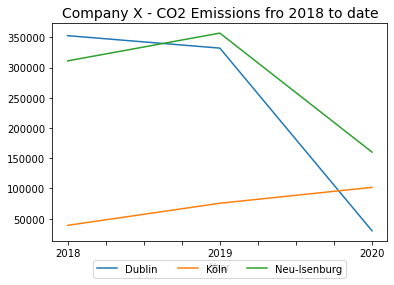

In [57]:
# Position the legend below the plot and flatten it to a single row.
ax = df_transposed_mock_data.plot.line(x='Year')

ax.legend(loc='upper center',bbox_to_anchor=(0.5, -0.065), ncol=3)
ax.set_title('Company X - CO2 Emissions fro 2018 to date', fontsize = 14)


# It's a bit small, change the size.

Text(0.5, 1.0, 'Company X - CO2 Emissions fro 2018 to date')

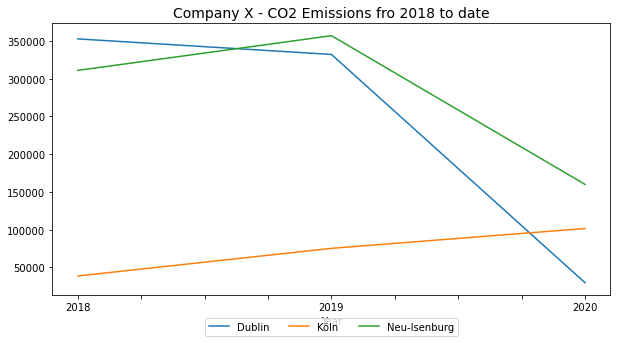

In [58]:
# Position the legend below the plot and flatten it to a single row.
ax = df_transposed_mock_data.plot.line(x='Year',figsize=(10,5))

ax.legend(loc='upper center',bbox_to_anchor=(0.5, -0.065), ncol=3)
ax.set_title('Company X - CO2 Emissions fro 2018 to date', fontsize = 14)


# Finally, add horizontal gridline to add definition.

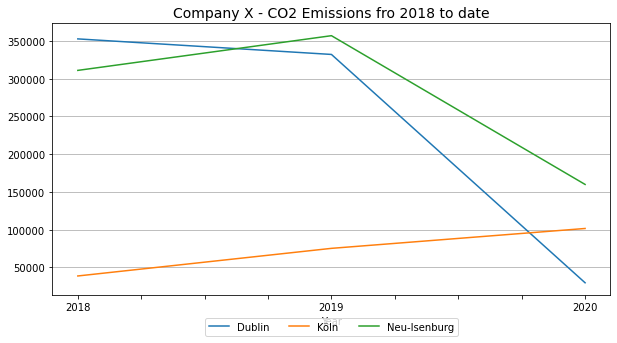

In [59]:
# Position the legend below the plot and flatten it to a single row.
ax = df_transposed_mock_data.plot.line(x='Year',figsize=(10,5))

ax.legend(loc='upper center',bbox_to_anchor=(0.5, -0.065), ncol=3)
ax.set_title('Company X - CO2 Emissions fro 2018 to date', fontsize = 14)

# Add Horizontal grid lines
ax.yaxis.grid()

